<a href="https://colab.research.google.com/github/victormattos2013/ml_finished_projects/blob/main/Atividade_Victor_Car_Prices__24_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/victormattos2013/machine_learning/main/car-prices.csv'

dados = pd.read_csv(url)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
mapa = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}
dados = dados.rename(columns = mapa)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


### Criando nova coluna

In [7]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados['ano_do_modelo']
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,yes,24
1,1,7843,1998,40557.96,yes,26
2,2,7109,2006,89627.50,no,18
3,3,26823,2015,95276.14,no,9
4,4,7935,2014,117384.68,yes,10


In [8]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,yes,24,35085.22134
1,1,7843,1998,40557.96,yes,26,12622.05362
2,2,7109,2006,89627.50,no,18,11440.79806
3,3,26823,2015,95276.14,no,9,43167.32682
4,4,7935,2014,117384.68,yes,10,12770.11290


In [9]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,yes,24,35085.22134
1,40557.96,yes,26,12622.05362
2,89627.50,no,18,11440.79806
3,95276.14,no,9,43167.32682
4,117384.68,yes,10,12770.11290


### Balanceamento

In [10]:
dados.vendido.value_counts()

vendido
yes    5800
no     4200
Name: count, dtype: int64

In [3]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = dados[['milhas_por_ano', 'ano_do_modelo', 'preco']]
y = dados['vendido']

seed = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len (teste_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


##MEU CLASSIFICADOR


### Linear SVC

In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

modelo = LinearSVC() #Cria modelo
modelo.fit(treino_x, treino_y) #Treina
previsoes = modelo.predict(teste_x) #Teste

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)

A acuracia foi 56.16%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##DUMMY

In [14]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier() #cria modelo
dummy_stratified.fit(treino_x, treino_y) #treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 #teste

print("A acuracia do dummy stratified foi %.2f%%" %acuracia)

A acuracia do dummy stratified foi 58.00%


### Modelo SVC - Scaler

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = dados[['km_por_ano', 'idade_do_modelo', 'preco']]
y = dados['vendido']

seed = 20
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len (teste_x)))
scaler = StandardScaler()
scaler.fit(raw_treino_x) #criando o normalizador treinando com o raw_treino_x
treino_x = scaler.transform(raw_treino_x) #treino_x normalizado
teste_x = scaler.transform(raw_teste_x) #teste_x normalizado

modelo = SVC(gamma = 'auto') #Cria modelo
modelo.fit(treino_x, treino_y) #Treina
previsoes = modelo.predict(teste_x) #Teste

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 75.92%


### Decision Tree

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

seed = 20
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len (teste_x)))

#arvores de decisão não são afetadas pela escala (Não precisa fazer normalização)
modelo = DecisionTreeClassifier(max_depth = 3, random_state = seed)
modelo.fit(raw_treino_x, treino_y) #Treina

previsoes = modelo.predict(raw_teste_x) #Teste
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 78.40%


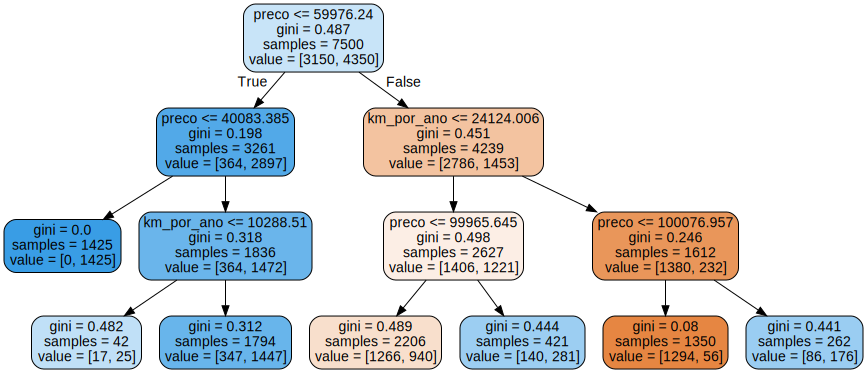

In [22]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, feature_names = features)
grafico = graphviz.Source(dot_data)
grafico

### Previsão

In [24]:
carro = [70000, 3, 20000]

previsao = modelo.predict(carro_normalizado)
print(previsao)

['yes']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
# prompt: TESTAR COM VALORES 7843	1998	40557.96

# Criando um DataFrame com os valores a serem testados
novo_dado = pd.DataFrame({
    'milhas_por_ano': [7843],
    'ano_do_modelo': [1998],
    'preco': [40557.96]
})

# Fazendo a previsão com o modelo treinado
previsao = modelo.predict(novo_dado)

print(previsao)


['yes']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
